In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d2 = pd.read_csv("d2_trabalhado.csv", sep=",")

In [2]:
X = d2.drop(['G3'], axis=1)
y = d2['G3']

## SelecktKBest

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

f_regression = SelectKBest(score_func=f_regression, k=8)
# k = 4 (é o número de variáveis selecionadas)

In [8]:
fit = f_regression.fit(X, y)
features = fit.transform(X)

In [9]:
print(features)

[[ 4  4  2 ...  1  0 11]
 [ 1  1  2 ...  1  9 11]
 [ 1  1  2 ...  2 12 13]
 ...
 [ 1  1  2 ...  1 11 12]
 [ 3  1  1 ...  3 10 10]
 [ 3  2  1 ...  3 10 11]]


In [10]:
cols = fit.get_support(indices=True)
d2.iloc[:, cols]

,Medu,Fedu,studytime,failures,higher,Dalc,G1,G2
0,4,4,2,0,1,1,0,11
1,1,1,2,0,1,1,9,11
2,1,1,2,0,1,2,12,13
3,4,2,3,0,1,1,14,14
4,3,3,2,0,1,1,11,13
...,...,...,...,...,...,...,...,...
644,2,3,3,1,1,1,10,11
645,3,1,2,0,1,1,15,15
646,1,1,2,0,1,1,11,12
647,3,1,1,0,1,3,10,10


## RFE

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='saga', max_iter=5000)
rfe = RFE(model, n_features_to_select=6, step=2)

In [12]:
fit = rfe.fit(X,y)

In [13]:
print("Número de features: {}".format(fit.n_features_))

Número de features: 6


In [15]:
cols = fit.get_support(indices=True)
d2.iloc[:, cols]

,age,schoolsup,freetime,G1,G2,G3
0,18,1,3,0,11,11
1,17,0,3,9,11,11
2,15,1,3,12,13,12
3,15,0,2,14,14,14
4,16,0,3,11,13,13
...,...,...,...,...,...,...
644,19,0,4,10,11,10
645,18,0,3,15,15,16
646,18,0,1,11,12,9
647,17,0,4,10,10,10


## RandomForest

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
model.fit(X,y)

print(model.feature_importances_)

[2.26035893e-03 5.58996613e-03 1.81216188e-03 1.30641384e-03
 3.20758651e-04 2.88443982e-03 2.66446810e-03 3.37536105e-03
 3.50372559e-03 5.76143003e-03 2.90620008e-03 3.63157011e-03
 4.52891712e-04 1.52674187e-03 1.52382343e-03 3.75829784e-04
 1.20818229e-03 1.62309480e-03 1.48206504e-02 6.49383978e-03
 7.51648068e-03 5.40383125e-03 5.82302558e-03 4.98316454e-03
 3.03049683e-02 1.03879122e-02 8.39890352e-01 6.86457946e-04
 4.68789205e-04 9.46875257e-04 2.09343176e-03 3.62427352e-03
 2.62156445e-04 3.89288396e-04 1.60098900e-03 2.05030699e-03
 4.34165666e-04 8.92493257e-03 8.13529663e-04 4.27858287e-03
 2.08361592e-03 8.36130386e-04 1.33263651e-03 8.22195419e-04]


In [19]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns = ['importance']).sort_values('importance',
                                   ascending=False)
feature_importances

,importance
G2,0.839890
absences,0.030305
famrel,0.014821
G1,0.010388
reason_course,0.008925
goout,0.007516
freetime,0.006494
Walc,0.005823
failures,0.005761
age,0.005590


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=0)

In [24]:
clf = clf.fit(X,y)

In [25]:
clf.feature_importances_

array([8.10957571e-04, 2.56198054e-03, 2.97686527e-03, 2.51240160e-03,
       6.45703574e-04, 3.00638746e-03, 2.75141397e-03, 7.99337670e-03,
       2.68516894e-03, 4.49712999e-03, 4.20572577e-04, 7.46238503e-04,
       4.57387612e-04, 1.44931199e-03, 1.10131363e-03, 1.18286037e-04,
       1.38000377e-04, 9.21107709e-03, 2.69086774e-02, 1.29144089e-03,
       3.92188237e-03, 1.36447673e-02, 3.29606961e-03, 2.54609820e-03,
       2.07123531e-02, 8.71541330e-03, 8.40524356e-01, 4.34067511e-04,
       0.00000000e+00, 2.00346975e-03, 7.35788753e-03, 9.23869637e-04,
       1.66339740e-04, 6.60751804e-04, 6.58928078e-04, 6.98911248e-04,
       1.18286037e-04, 5.92251617e-04, 3.17520347e-04, 1.64939759e-02,
       3.23438383e-04, 3.06348347e-03, 1.10893160e-04, 4.31294034e-04])

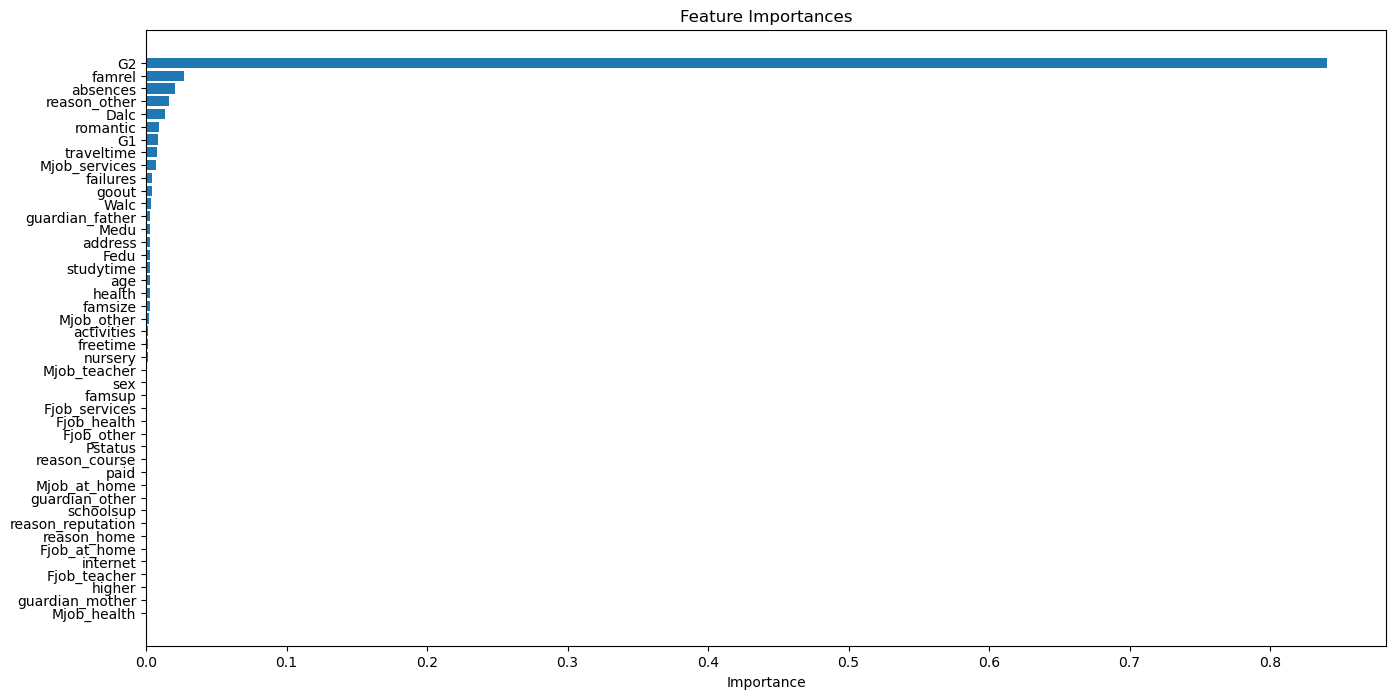

In [26]:
feature_names = X.columns
importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(16, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## SelectFromModel

In [29]:
from sklearn.feature_selection import SelectFromModel

estimator = DecisionTreeRegressor(random_state=0)

seletor = SelectFromModel(estimator, threshold=0, max_features=6)
seletor = seletor.fit(X,y)

seletor.get_feature_names_out()

array(['romantic', 'famrel', 'Dalc', 'absences', 'G2', 'reason_other'],
      dtype=object)